# 1.1 快速运行几个demo 
---
#### 使用backtrader进行回测分析包含以下几个步骤：
    - 创建策略
        - 确定要调优的参数：可以分析确定是否有效的，或者通过回测要确定最优值的
        - 初始化策略中用到的指标数据：通过引擎传入的数据实现
        - 判断是否达到了买卖点
    - 执行引擎
        - 初始化引擎
        - 注入创建的策略
        - 加载和注入数据Feed
        - 运行引擎
        - 进行可视化分析


#### 1.1.1 先运行引擎看看
第一步是让程序跑起来，而不是考虑策略，因此首先初始化引擎运行看看。

In [1]:
# 引用backtrader
import backtrader as bt
if __name__ == '__main__':
    # 1. 初始化引擎
    cerebro = bt.Cerebro()
    # 2. 打印策略执行前的资金
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # 3. 执行引擎
    cerebro.run()
    # 4.打印策略执行后的资金
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10000.00


可以看到, 引擎默认初始资金为10000.00；下一步尝试自定义初始资金为1000000.0。

In [2]:
import backtrader as bt
if __name__ == '__main__':
    # 1. 初始化引擎
    cerebro = bt.Cerebro()
    # 2.设置初始化资金为100万
    cerebro.broker.setcash(1000000.0)
    # 3. 打印策略执行前的资金
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # 4. 执行引擎
    cerebro.run()
    # 5.打印策略执行后的资金
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 1000000.00
Final Portfolio Value: 1000000.00


初始资金被成功修改为1000000.00。

##### 1.1.2 尝试添加数据
尝试执行完引擎后，下一步要做的就是尝试添加数据，和上一节相比，输出不会有任何变化，这是因为仅加载了数据，但并未使用它。

In [3]:
# 引用backtrader
import backtrader as bt
import datetime
if __name__ == '__main__':
    # 1. 初始化引擎
    cerebro = bt.Cerebro()
    # 2.  引用一个数据源, 读取雅虎数据格式的本地文件
    # 这里暂时不用关心数据的具体格式，自定义数据加载及其它源加载，后续章节会讲到
    data = bt.feeds.YahooFinanceCSVData(
    dataname='./GSPC.csv',
    fromdate=datetime.datetime(2019, 8, 20),
    todate=datetime.datetime(2020, 8, 20),
    reverse=False)

    # 添加数据到引擎中
    cerebro.adddata(data)
    # 3.设置初始化资金为100万
    cerebro.broker.setcash(1000000.0)
    # 4. 打印策略执行前的资金
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # 5. 执行引擎
    cerebro.run()
    # 6.打印策略执行后的资金
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())


Starting Portfolio Value: 1000000.00
Final Portfolio Value: 1000000.00


#### 1.1.3 运行第一个策略
设置了资金和行情数据后，就可以创建策略，训练模型。策略必须继承bt策略类，接下来执行一个例子，如果价格下降到2500点以下，就认为价格到达了低点，记录收盘的价格。

In [4]:
# 3.1 创建的策略必须继承bt策略基类
class TestStrategy(bt.Strategy):
    # 3.2 数据和策略添加到同一引擎后，在策略中可通过datas访问数据，这里仅获取了传送数据的收盘价信息
    def __init__(self):
        self.dataclose = self.datas[0].close

    # 3.3 定义本策略的日志文件
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    # 3.4 添加策略逻辑的地方，添加数据后，遍历每个日期进行调用，当前在的时间点坐标为0，其前面一根或者说之前一个交易日的索引为-1，依次类推
    def next(self):
        # 如果价格低于2500点，就记录下收盘价
        if self.dataclose[0] < 2500:
            self.log('Close, %.2f' % self.dataclose[0])

 # 引用backtrader
import backtrader as bt
if __name__ == '__main__':
    # 1. 初始化引擎
    cerebro = bt.Cerebro()
    # 2.  引用一个数据源, 读取雅虎数据格式的本地文件
    # 这里暂时不用关心数据的具体格式，自定义数据加载及其它源加载，后续章节会讲到
    data = bt.feeds.YahooFinanceCSVData(
    dataname='./GSPC.csv',
    fromdate=datetime.datetime(2019, 8, 20),
    todate=datetime.datetime(2020, 8, 20),
    reverse=False)

    # 添加数据到引擎中
    cerebro.adddata(data)
    # 3. 添加策略类到引擎中
    cerebro.addstrategy(TestStrategy)
    # 4.设置初始化资金为100万
    cerebro.broker.setcash(1000000.0)
    # 5. 打印策略执行前的资金
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # 6. 执行引擎
    cerebro.run()
    # 7.打印策略执行后的资金
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())


Starting Portfolio Value: 1000000.00
2020-03-12, Close, 2480.64
2020-03-16, Close, 2386.13
2020-03-18, Close, 2398.10
2020-03-19, Close, 2409.39
2020-03-20, Close, 2304.92
2020-03-23, Close, 2237.40
2020-03-24, Close, 2447.33
2020-03-25, Close, 2475.56
2020-04-01, Close, 2470.50
2020-04-03, Close, 2488.65
Final Portfolio Value: 1000000.00


价格到达低点，触发了我们的条件，记录了收盘价，那干嘛不直接执行买入呢？

In [15]:
# 3.1 创建的策略必须继承bt策略基类
class TestStrategy(bt.Strategy):
    # 3.2 数据和策略添加到同一引擎后，在策略中可通过datas访问数据，这里仅获取了传送数据的收盘价信息
    def __init__(self):
        self.dataclose = self.datas[0].close

    # 3.3 定义本策略的日志文件
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    # 3.4 添加策略逻辑的地方，添加数据后，遍历每个日期进行调用，当前在的时间点坐标为0，其前面一根K线或者说之前一个交易节点的索引为-1，依次类推
    def next(self):
        # 3.5 0 当前交易节点的索引，-1 上一个交易节点的索引
        if self.dataclose[0] < 2500:

            # 3.6 条件满足,则发出下单指令并log记录，默认使用下一根K线的开盘价；如果未指定买入标的，则买入self.datas[0]的标的
            self.buy()
            self.log('BUY CREATE, %.2f' % self.dataclose[0])

 # 引用backtrader
import backtrader as bt
if __name__ == '__main__':
    # 1. 初始化引擎
    cerebro = bt.Cerebro()
    # 2.  引用一个数据源, 读取雅虎数据格式的本地文件
    # 这里暂时不用关心数据的具体格式，自定义数据加载及其它源加载，后续章节会讲到
    data = bt.feeds.YahooFinanceCSVData(
    dataname='./GSPC.csv',
    fromdate=datetime.datetime(2019, 8, 20),
    todate=datetime.datetime(2020, 8, 20),
    reverse=False)

    # 添加数据到引擎中
    cerebro.adddata(data)
    # 3. 添加策略类到引擎中
    cerebro.addstrategy(TestStrategy)
    # 4.设置初始化资金为100万
    cerebro.broker.setcash(1000000.0)
    # 5. 打印策略执行前的资金
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # 6. 执行引擎
    cerebro.run()
    # 7.打印策略执行后的资金
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 1000000.00
2020-03-12, BUY CREATE, 2480.64
2020-03-16, BUY CREATE, 2386.13
2020-03-18, BUY CREATE, 2398.10
2020-03-19, BUY CREATE, 2409.39
2020-03-20, BUY CREATE, 2304.92
2020-03-23, BUY CREATE, 2237.40
2020-03-24, BUY CREATE, 2447.33
2020-03-25, BUY CREATE, 2475.56
2020-04-01, BUY CREATE, 2470.50
2020-04-03, BUY CREATE, 2488.65
Final Portfolio Value: 1009296.40


上面的例子中，日志记录了触发点的日期，买入标识，以及收盘价。但我们不知道的是，发出的订单是否被执行了，如果执行了，是什么价格，买了多少，以及如何选择卖出时机呢？下面我们要获取订单的状态，以及寻找卖点。

In [5]:
class TestStrategy(bt.Strategy):
    # 3.2 数据和策略添加到同一引擎后，在策略中可通过datas访问数据，这里仅获取了传送数据的收盘价信息
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None

    # 3.3 定义本策略的日志文件
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    ## 3.4 添加策略逻辑的地方，添加数据后，遍历每个日期进行调用，当前在的时间点坐标为0，其前面一根或者说之前一个交易节点的索引为-1，依次类推
    def next(self):
        # 3.4.1 为了简单示例，检查是否有处理中的订单， 不再重复下
        if self.order:
            return

        # 3.4.2 检测是否已经有持仓
        if not self.position:

            # 3.4.3 没有持仓，判断是否满足买的条件
            if self.dataclose[0] < 2500:

                # 3.4.4 价格低于2500，到达买点，下单，默认使用下一根K线的开盘价；
                # self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # 3.4.5 跟踪订单
                self.order = self.buy()

        else:

            # 3.4.6 已经有持仓，判断是否到达卖的条件
            if self.dataclose[0] > 3000:
                # 3.4.7 价格高于3000，市场被高估，卖出
                # self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # 3.4.8 跟踪订单
                self.order = self.sell()

    # 3.5 订单状态回调
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # 3.5.1 状态变更信息，直接返回
            return

        # 3.5.2 检查订单是否已完成，有可能回测拒单：因为剩余资金可能不足
        if order.status in [order.Completed]:
            # 3.5.3 订单已执行，无论买卖都打印
            if order.isbuy(): 
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)
            # 3.5.4 记录执行的日期
            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            # 3.5.5 订单未能执行
            self.log('Order Canceled/Margin/Rejected')

        # 3.5.6 订单均已处理完成
        self.order = None

# 引用backtrader
import backtrader as bt
if __name__ == '__main__':
    # 1. 初始化引擎
    cerebro = bt.Cerebro()
    # 2.  引用一个数据源, 读取雅虎数据格式的本地文件
    # 这里暂时不用关心数据的具体格式，自定义数据加载及其它源加载，后续章节会讲到
    data = bt.feeds.YahooFinanceCSVData(
    dataname='./GSPC.csv',
    fromdate=datetime.datetime(2019, 8, 20),
    todate=datetime.datetime(2020, 8, 20),
    reverse=False)

    # 添加数据到引擎中
    cerebro.adddata(data)
    # 3. 添加策略类到引擎中
    cerebro.addstrategy(TestStrategy)
    # 4.设置初始化资金为100万
    cerebro.broker.setcash(1000000.0)
    # 5. 打印策略执行前的资金
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # 6. 执行引擎
    cerebro.run()
    # 7.打印策略执行后的资金
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 1000000.00
2020-03-13, BUY EXECUTED, 2569.99
2020-05-28, SELL EXECUTED, 3046.61
Final Portfolio Value: 1000476.62


可以看到，订单的买入、卖出及执行价格都被记录了下来。在我们未指定下单数量的时候，系统默认为1（买入价格为下一个K线的开盘价）。系统最终盈利: 3046.61 - 2569.99 = 476.62。如果最后一天是有持仓的，则在计算最终组合价值时，使用持有股票最后的收盘价来进行计算。

#### 1.1.4 利润的侵蚀者：佣金
无论在什么时候，佣金都不可忽视。

In [6]:
class TestStrategy(bt.Strategy):
    # 3.2 数据和策略添加到同一引擎后，在策略中可通过datas访问数据，这里仅获取了传送数据的收盘价信息
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None

    # 3.3 定义本策略的日志文件
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    ## 3.4 添加策略逻辑的地方，添加数据后，遍历每个日期进行调用，当前在的时间点坐标为0，其前面一根或者说之前一个交易节点的索引为-1，依次类推
    def next(self):
        # 3.4.1 检查是否有处理中的订单， 不再重复下
        if self.order:
            return

        # 3.4.2 检测是否已经有持仓
        if not self.position:

            # 3.4.3 没有持仓，判断是否满足买的条件
            if self.dataclose[0] < 2500:

                # 3.4.4 条件满足，下单，默认使用下一根K线的开盘价；
                # self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # 3.4.5 跟踪订单
                self.order = self.buy()

        else:

            # 3.4.6 已经有持仓，判断是否到达卖的条件
            if self.dataclose[0] > 3000:
                # 3.4.7 条件满足，卖出
                # self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # 3.4.8 跟踪订单
                self.order = self.sell()

    # 3.5 订单状态回调
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # 3.5.1 状态变更信息，直接返回
            return

        # 3.5.2 检查订单是否已完成，有可能回测拒单：因为剩余资金可能不足
        if order.status in [order.Completed]:
            # 3.5.3 订单已执行，无论买卖都打印
            if order.isbuy(): 
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                    order.executed.value,
                    order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                        (order.executed.price,
                        order.executed.value,
                        order.executed.comm))
            # 3.5.4 记录执行的日期
            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            # 3.5.5 订单未能执行
            self.log('Order Canceled/Margin/Rejected')

        # 3.5.6 订单均已处理完成
        self.order = None

    # 3.6.1 交易结果回调
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                (trade.pnl, trade.pnlcomm))
# 引用backtrader
import backtrader as bt
if __name__ == '__main__':
    # 1. 初始化引擎
    cerebro = bt.Cerebro()
    # 2.  引用一个数据源, 读取雅虎数据格式的本地文件
    # 这里暂时不用关心数据的具体格式，自定义数据加载及其它源加载，后续章节会讲到
    data = bt.feeds.YahooFinanceCSVData(
    dataname='./GSPC.csv',
    fromdate=datetime.datetime(2019, 8, 20),
    todate=datetime.datetime(2020, 6, 20),
    reverse=False)

    # 添加数据到引擎中
    cerebro.adddata(data)
    # 3. 添加策略类到引擎中
    cerebro.addstrategy(TestStrategy)
    # 4.设置初始化资金为100万
    cerebro.broker.setcash(1000000.0)
    # 4.1 佣金设置为万3
    cerebro.broker.setcommission(commission=0.0003)
    # 5. 打印策略执行前的资金
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # 6. 执行引擎
    cerebro.run()
    # 7.打印策略执行后的资金
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 1000000.00
2020-03-13, BUY EXECUTED, Price: 2569.99, Cost: 2569.99, Comm 0.77
2020-05-28, SELL EXECUTED, Price: 3046.61, Cost: 2569.99, Comm 0.91
2020-05-28, OPERATION PROFIT, GROSS 476.62, NET 474.94
Final Portfolio Value: 1000474.94


相比上一节，增加了佣金设置，即Comm, 双向收取，如果买卖频率过高，将极大的侵蚀利润。这里还没有添加印花税。476.62-0.77-0.91= 474.94, 474.94才是暂时属于我们的利润。

#### 1.1.5  自定义策略参数
策略应该尽量是模板式的，这样环境变了才能更方便的修改优化，这也契合backtrader的设计思想。那怎么自定义策略参数呢？

In [7]:
class TestStrategy(bt.Strategy):
    # 3.2 数据和策略添加到同一引擎后，在策略中可通过datas访问数据，这里仅获取了传送数据的收盘价信息
    def __init__(self, sellprice):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.sellprice = sellprice

    # 3.3 定义本策略的日志文件
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    ## 3.4 添加策略逻辑的地方，添加数据后，遍历每个日期进行调用，当前在的时间点坐标为0，其前面一根或者说之前一个交易节点的索引为-1，依次类推
    def next(self):
        # 3.4.1 检查是否有处理中的订单， 不再重复下
        if self.order:
            return

        # 3.4.2 检测是否已经有持仓
        if not self.position:

            # 3.4.3 没有持仓，判断是否满足买的条件
            if self.dataclose[0] < 2500:

                # 3.4.4 条件满足，下单，默认使用下一根K线的开盘价；
                # self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # 3.4.5 跟踪订单
                self.order = self.buy()

        else:

            # 3.4.6 已经有持仓，判断是否到达卖的条件
            if self.dataclose[0] > self.sellprice:
                # 3.4.7 条件满足，卖出
                # self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # 3.4.8 跟踪订单
                self.order = self.sell()

    # 3.5 订单状态回调
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # 3.5.1 状态变更信息，直接返回
            return

        # 3.5.2 检查订单是否已完成，有可能回测拒单：因为剩余资金可能不足
        if order.status in [order.Completed]:
            # 3.5.3 订单已执行，无论买卖都打印
            if order.isbuy(): 
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                    order.executed.value,
                    order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                        (order.executed.price,
                        order.executed.value,
                        order.executed.comm))
            # 3.5.4 记录执行的日期
            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            # 3.5.5 订单未能执行
            self.log('Order Canceled/Margin/Rejected')

        # 3.5.6 订单均已处理完成
        self.order = None

    # 3.6.1 交易结果回调
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                (trade.pnl, trade.pnlcomm))
# 引用backtrader
import backtrader as bt
if __name__ == '__main__':
    # 1. 初始化引擎
    cerebro = bt.Cerebro()
    # 2.  引用一个数据源, 读取雅虎数据格式的本地文件
    # 这里暂时不用关心数据的具体格式，自定义数据加载及其它源加载，后续章节会讲到
    data = bt.feeds.YahooFinanceCSVData(
    dataname='./GSPC.csv',
    fromdate=datetime.datetime(2019, 8, 20),
    todate=datetime.datetime(2020, 6, 20),
    reverse=False)

    # 添加数据到引擎中
    cerebro.adddata(data)
    # 3. 添加策略类到引擎中,自定义卖出参数，到3200才卖
    cerebro.addstrategy(TestStrategy, sellprice=3200)
    # 4.设置初始化资金为100万
    cerebro.broker.setcash(1000000.0)
    # 4.1 佣金设置为万3
    cerebro.broker.setcommission(commission=0.0003)
    # 5. 打印策略执行前的资金
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # 6. 执行引擎
    cerebro.run()
    # 7.打印策略执行后的资金
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 1000000.00
2020-03-13, BUY EXECUTED, Price: 2569.99, Cost: 2569.99, Comm 0.77
2020-06-09, SELL EXECUTED, Price: 3213.32, Cost: 2569.99, Comm 0.96
2020-06-09, OPERATION PROFIT, GROSS 643.33, NET 641.60
Final Portfolio Value: 1000641.60


这里仅简单的自定义了卖出价格，随着模型的逐步建立，个性化的参数也会不断增加，最好把参数保存到文件或者缓存redis集群中。

#### 1.1.6 添加技术指标
除了价格信息，很多时候技术指标更能反应当前的行情趋势，而无需关心现在价位，因为无论价格多高，只要还会上涨，就可以通过做多盈利。幸运的是，backtrader内置了常用的金融分析库talib，可以很方便的添加技术指标；这里需要提前说明的是，talib中的部分技术指标计算与中国国内券商采用的部分指标计算方式略有不同，这点在后面会进行说明。这里构造一个双均线策略，即MA5上穿MA15则买入，MA5下穿MA15则卖出。

In [8]:
class TestStrategy(bt.Strategy):
    # 3.2 数据和策略添加到同一引擎后，在策略中可通过datas访问数据，这里仅获取了传送数据的收盘价信息
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        # 3.2.1 数据初始化的时候就添加技术指标的计算
        self.sma5 = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=5)
        self.sma15 = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=15)

    # 3.3 定义本策略的日志文件
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    ## 3.4 添加策略逻辑的地方，添加数据后，遍历每个日期进行调用，当前在的时间点坐标为0，其前面一根或者说之前一个交易节点的索引为-1，依次类推
    def next(self):
        # 3.4.1 检查是否有处理中的订单， 不再重复下
        if self.order:
            return

        # 3.4.2 检测是否已经有持仓
        if not self.position:

            # 3.4.3 没有持仓，判断是否满足买的条件
            if self.sma5[-1] < self.sma15[-1] and self.sma5[0] > self.sma15[0]:

                # 3.4.4 前一天条件满足，下单，默认使用下一根K线的开盘价；
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # 3.4.5 跟踪订单
                self.order = self.buy()

        else:

            # 3.4.6 已经有持仓，判断是否到达卖的条件
            if self.sma5[-1] > self.sma15[-1] and self.sma5[0] < self.sma15[0]:
                # 3.4.7 条件满足，卖出
                # self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # 3.4.8 跟踪订单
                self.order = self.sell()

    # 3.5 订单状态回调
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # 3.5.1 状态变更信息，直接返回
            return

        # 3.5.2 检查订单是否已完成，有可能回测拒单：因为剩余资金可能不足
        if order.status in [order.Completed]:
            # 3.5.3 订单已执行，无论买卖都打印
            if order.isbuy(): 
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                    order.executed.value,
                    order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                        (order.executed.price,
                        order.executed.value,
                        order.executed.comm))
            # 3.5.4 记录执行的日期
            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            # 3.5.5 订单未能执行
            self.log('Order Canceled/Margin/Rejected')

        # 3.5.6 订单均已处理完成
        self.order = None

    # 3.6.1 交易结果回调
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                (trade.pnl, trade.pnlcomm))
# 引用backtrader
import backtrader as bt
if __name__ == '__main__':
    # 1. 初始化引擎
    cerebro = bt.Cerebro()
    # 2.  引用一个数据源, 读取雅虎数据格式的本地文件
    # 这里暂时不用关心数据的具体格式，自定义数据加载及其它源加载，后续章节会讲到
    data = bt.feeds.YahooFinanceCSVData(
    dataname='./GSPC.csv',
    fromdate=datetime.datetime(2019, 8, 20),
    todate=datetime.datetime(2020, 6, 20),
    reverse=False)

    # 添加数据到引擎中
    cerebro.adddata(data)
    # 3. 添加策略类到引擎中
    cerebro.addstrategy(TestStrategy)
    # 4.设置初始化资金为100万
    cerebro.broker.setcash(1000000.0)
    # 4.1 佣金设置为万3
    cerebro.broker.setcommission(commission=0.0003)
    # 5. 打印策略执行前的资金
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # 6. 执行引擎
    cerebro.run()
    # 7.打印策略执行后的资金
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 1000000.00
2019-10-15, BUY CREATE, 2995.68
2019-10-16, BUY EXECUTED, Price: 2989.68, Cost: 2989.68, Comm 0.90
2019-12-06, SELL EXECUTED, Price: 3134.62, Cost: 2989.68, Comm 0.94
2019-12-06, OPERATION PROFIT, GROSS 144.94, NET 143.10
2019-12-10, BUY CREATE, 3132.52
2019-12-11, BUY EXECUTED, Price: 3135.75, Cost: 3135.75, Comm 0.94
2020-01-30, SELL EXECUTED, Price: 3256.45, Cost: 3135.75, Comm 0.98
2020-01-30, OPERATION PROFIT, GROSS 120.70, NET 118.78
2020-02-07, BUY CREATE, 3327.71
2020-02-10, BUY EXECUTED, Price: 3318.28, Cost: 3318.28, Comm 1.00
2020-02-25, SELL EXECUTED, Price: 3238.94, Cost: 3318.28, Comm 0.97
2020-02-25, OPERATION PROFIT, GROSS -79.34, NET -81.31
2020-03-30, BUY CREATE, 2626.65
2020-03-31, BUY EXECUTED, Price: 2614.69, Cost: 2614.69, Comm 0.78
2020-05-18, SELL EXECUTED, Price: 2913.86, Cost: 2614.69, Comm 0.87
2020-05-18, OPERATION PROFIT, GROSS 299.17, NET 297.51
2020-05-20, BUY CREATE, 2971.61
2020-05-21, BUY EXECUTED, Price: 2969.95, C

#### 1.1.7 可视化买卖点
尽管已经执行了策略，但结果却不是那么显而易见，在哪个点买入，哪个点卖出，是否符合逻辑，当时的趋势怎么样,，即使日志能找到也很抽象，显然不符合人来的视觉习惯，怎么可以图形化展示呢？backtrader依赖matplotlib提供了将执行结果可视化的功能，这里继续使用上一节的例子，对结果添加可视化，代码里唯一的改动是添加了第八项绘图展示。

Starting Portfolio Value: 1000000.00
2019-10-15, BUY CREATE, 2995.68
2019-10-16, BUY EXECUTED, Price: 2989.68, Cost: 2989.68, Comm 0.90
2019-12-06, SELL EXECUTED, Price: 3134.62, Cost: 2989.68, Comm 0.94
2019-12-06, OPERATION PROFIT, GROSS 144.94, NET 143.10
2019-12-10, BUY CREATE, 3132.52
2019-12-11, BUY EXECUTED, Price: 3135.75, Cost: 3135.75, Comm 0.94
2020-01-30, SELL EXECUTED, Price: 3256.45, Cost: 3135.75, Comm 0.98
2020-01-30, OPERATION PROFIT, GROSS 120.70, NET 118.78
2020-02-07, BUY CREATE, 3327.71
2020-02-10, BUY EXECUTED, Price: 3318.28, Cost: 3318.28, Comm 1.00
2020-02-25, SELL EXECUTED, Price: 3238.94, Cost: 3318.28, Comm 0.97
2020-02-25, OPERATION PROFIT, GROSS -79.34, NET -81.31
2020-03-30, BUY CREATE, 2626.65
2020-03-31, BUY EXECUTED, Price: 2614.69, Cost: 2614.69, Comm 0.78
2020-05-18, SELL EXECUTED, Price: 2913.86, Cost: 2614.69, Comm 0.87
2020-05-18, OPERATION PROFIT, GROSS 299.17, NET 297.51
2020-05-20, BUY CREATE, 2971.61
2020-05-21, BUY EXECUTED, Price: 2969.95, C

<IPython.core.display.Javascript object>


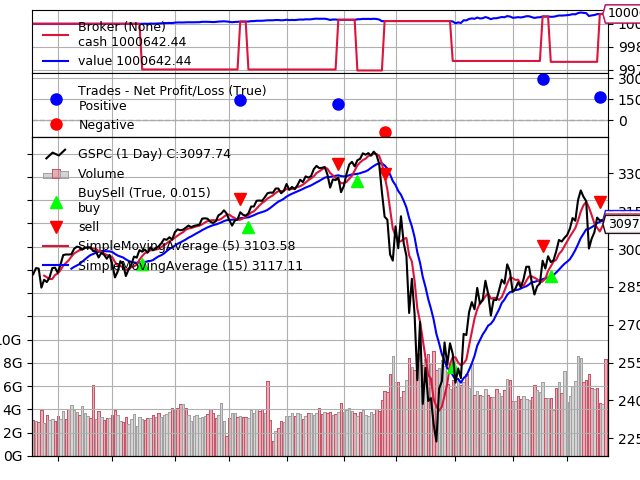

In [9]:
class TestStrategy(bt.Strategy):
    # 3.2 数据和策略添加到同一引擎后，在策略中可通过datas访问数据，这里仅获取了传送数据的收盘价信息
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        # 3.2.1 数据初始化的时候就添加技术指标的计算
        self.sma5 = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=5)
        self.sma15 = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=15)

    # 3.3 定义本策略的日志文件
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    ## 3.4 添加策略逻辑的地方，添加数据后，遍历每个日期进行调用，当前在的时间点坐标为0，其前面一根或者说之前一个交易节点的索引为-1，依次类推
    def next(self):
        # 3.4.1 检查是否有处理中的订单， 不再重复下
        if self.order:
            return

        # 3.4.2 检测是否已经有持仓
        if not self.position:

            # 3.4.3 没有持仓，判断是否满足买的条件
            if self.sma5[-1] < self.sma15[-1] and self.sma5[0] > self.sma15[0]:

                # 3.4.4 前一天条件满足，下单，默认使用下一根K线的开盘价；
                self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # 3.4.5 跟踪订单
                self.order = self.buy()

        else:

            # 3.4.6 已经有持仓，判断是否到达卖的条件
            if self.sma5[-1] > self.sma15[-1] and self.sma5[0] < self.sma15[0]:
                # 3.4.7 条件满足，卖出
                # self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # 3.4.8 跟踪订单
                self.order = self.sell()

    # 3.5 订单状态回调
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # 3.5.1 状态变更信息，直接返回
            return

        # 3.5.2 检查订单是否已完成，有可能回测拒单：因为剩余资金可能不足
        if order.status in [order.Completed]:
            # 3.5.3 订单已执行，无论买卖都打印
            if order.isbuy(): 
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                    order.executed.value,
                    order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            elif order.issell():
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                        (order.executed.price,
                        order.executed.value,
                        order.executed.comm))
            # 3.5.4 记录执行的日期
            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            # 3.5.5 订单未能执行
            self.log('Order Canceled/Margin/Rejected')

        # 3.5.6 订单均已处理完成
        self.order = None

    # 3.6.1 交易结果回调
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                (trade.pnl, trade.pnlcomm))
# 引用backtrader
import backtrader as bt
if __name__ == '__main__':
    # 1. 初始化引擎
    cerebro = bt.Cerebro()
    # 2.  引用一个数据源, 读取雅虎数据格式的本地文件
    # 这里暂时不用关心数据的具体格式，自定义数据加载及其它源加载，后续章节会讲到
    data = bt.feeds.YahooFinanceCSVData(
    dataname='./GSPC.csv',
    fromdate=datetime.datetime(2019, 8, 20),
    todate=datetime.datetime(2020, 6, 20),
    reverse=False)

    # 添加数据到引擎中
    cerebro.adddata(data)
    # 3. 添加策略类到引擎中
    cerebro.addstrategy(TestStrategy)
    # 4.设置初始化资金为100万
    cerebro.broker.setcash(1000000.0)
    # 4.1 佣金设置为万3
    cerebro.broker.setcommission(commission=0.0003)
    # 5. 打印策略执行前的资金
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # 6. 执行引擎
    cerebro.run()
    # 7.打印策略执行后的资金
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # 8. 调用plot()将结果绘图展示
    cerebro.plot()

#### 1.1.8 优化策略参数
在双均线的例子中，我们使用的分别是5日和15日K线。不同的标的对应的参与人群、股本、行业景气度等不同，导致每个标的可能都有适合自己的参数，人工输入校验找规律对比显然是不现实的，那使用backtrader如何实现呢？

In [10]:
class TestStrategy(bt.Strategy):
    params = (
        ('shortMaPeriod', 5),
        ('longMaPeriod', 15),
    )
    # 3.2 数据和策略添加到同一引擎后，在策略中可通过datas访问数据，这里仅获取了传送数据的收盘价信息
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        # 3.2.1 数据初始化的时候就添加技术指标的计算
        self.smashort = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.shortMaPeriod)
        self.smalong = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.longMaPeriod)

    # 3.3 定义本策略的日志文件
    def log(self, txt, dt=None):
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    ## 3.4 添加策略逻辑的地方，添加数据后，遍历每个日期进行调用，当前在的时间点坐标为0，其前面一根或者说之前一个交易节点的索引为-1，依次类推
    def next(self):
        # 3.4.1 检查是否有处理中的订单， 不再重复下
        if self.order:
            return

        # 3.4.2 检测是否已经有持仓
        if not self.position:

            # 3.4.3 没有持仓，判断是否满足买的条件
            if self.smashort[-1] < self.smalong[-1] and self.smashort[0] > self.smalong[0]:

                # 3.4.4 前一天条件满足，下单，默认使用下一根K线的开盘价；
                # self.log('BUY CREATE, %.2f' % self.dataclose[0])

                # 3.4.5 跟踪订单
                self.order = self.buy()

        else:

            # 3.4.6 已经有持仓，判断是否到达卖的条件
            if self.smashort[-1] > self.smalong[-1] and self.smashort[0] < self.smalong[0]:
                # 3.4.7 条件满足，卖出
                # self.log('SELL CREATE, %.2f' % self.dataclose[0])

                # 3.4.8 跟踪订单
                self.order = self.sell()

    # 3.5 订单状态回调
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # 3.5.1 状态变更信息，直接返回
            return

        # 3.5.2 检查订单是否已完成，有可能回测拒单：因为剩余资金可能不足
        if order.status in [order.Completed]:
            # 3.5.3 订单已执行，无论买卖都打印
            if order.isbuy(): 

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            
            # 3.5.4 记录执行的日期
            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            # 3.5.5 订单未能执行
            self.log('Order Canceled/Margin/Rejected')

        # 3.5.6 订单均已处理完成
        self.order = None

    # 3.6 交易结果回调
    def notify_trade(self, trade):
        if not trade.isclosed:
            return
    # 3.7 添加策略停止时的价值统计
    def stop(self):
        self.log('(shortMaPeriod %2d) (longMaPeriod %2d) Ending Value %.2f' %
                 (self.params.shortMaPeriod, self.params.longMaPeriod, self.broker.getvalue()))
        
# 引用backtrader
import backtrader as bt
if __name__ == '__main__':
    # 1. 初始化引擎
    cerebro = bt.Cerebro()
    # 2.  引用一个数据源, 读取雅虎数据格式的本地文件
    # 这里暂时不用关心数据的具体格式，自定义数据加载及其它源加载，后续章节会讲到
    data = bt.feeds.YahooFinanceCSVData(
    dataname='./GSPC.csv',
    fromdate=datetime.datetime(2019, 8, 20),
    todate=datetime.datetime(2020, 6, 20),
    reverse=False)

    # 添加数据到引擎中
    cerebro.adddata(data)
    # 3. 参数优化调用optstrategy,设置传入参数范围
    cerebro.optstrategy(TestStrategy, shortMaPeriod=range(5,15, 5), longMaPeriod=[15, 20, 30,60])
    # 4.设置初始化资金为100万
    cerebro.broker.setcash(1000000.0)
    # 4.1 佣金设置为万3
    cerebro.broker.setcommission(commission=0.0003)
    # 5. 打印策略执行前的资金
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    # 6. 执行引擎
    cerebro.run()

Starting Portfolio Value: 1000000.00
2020-06-19, (shortMaPeriod  5) (longMaPeriod 20) Ending Value 1000577.52
2020-06-19, (shortMaPeriod  5) (longMaPeriod 60) Ending Value 1000227.79
2020-06-19, (shortMaPeriod  5) (longMaPeriod 15) Ending Value 1000642.44
2020-06-19, (shortMaPeriod  5) (longMaPeriod 30) Ending Value 1000340.50
2020-06-19, (shortMaPeriod 10) (longMaPeriod 20) Ending Value 1000229.32
2020-06-19, (shortMaPeriod 10) (longMaPeriod 15) Ending Value 1000433.96
2020-06-19, (shortMaPeriod 10) (longMaPeriod 60) Ending Value 1000213.74
2020-06-19, (shortMaPeriod 10) (longMaPeriod 30) Ending Value 1000222.38


短均线使用了5\10两种均线类型,长均线使用15\20\30\60四种均线类型，共产生2*4 = 8种结果，可以看到，不同参数的回测结果是不一样的，其短均线为5，长均线为15时获取到了最大收益。
